In [47]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0],True)

1


In [49]:
data = pd.read_csv('Churn_modelling.csv')
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3951,3952,15619972,Akabueze,807,France,Female,47,9,167664.83,1,0,0,125440.11,1
6341,6342,15658364,Laney,807,Germany,Female,40,1,134590.21,1,1,1,46253.65,0
5450,5451,15580227,Moss,803,France,Male,33,6,0.00,2,1,0,115676.61,0
9886,9887,15719541,Flannagan,675,Spain,Male,31,2,90826.27,2,1,0,60270.87,0
4086,4087,15764294,Ifeatu,759,Germany,Male,31,4,98899.91,1,1,1,47832.82,0
7273,7274,15671582,John,660,Spain,Male,38,6,109869.32,1,1,1,154641.91,0
3779,3780,15694160,Sagese,624,France,Male,37,0,0.00,2,0,0,112104.55,0
6945,6946,15747821,K?,554,Germany,Female,31,6,135470.90,1,1,0,107074.81,0
9704,9705,15759872,L?,625,France,Male,22,9,0.00,2,1,0,157072.91,0
6536,6537,15756743,Howells,625,France,Female,37,7,115895.42,1,1,0,48486.25,0


In [50]:
#extracting independent and dependent variable
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [51]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [52]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [53]:
#feature enginnering
geography = pd.get_dummies(X['Geography'])
geography = geography.astype(int)
geography = geography.drop(['France'],axis =1)

gender = pd.get_dummies(X['Gender'])
gender = gender.astype(int)
gender = gender.drop(['Female'], axis = 1)

gender


,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [54]:
X=X.drop(['Geography', 'Gender'], axis = 1)

In [55]:
X=pd.concat([X,geography,gender], axis =1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [56]:
#splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =  42)

In [57]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [59]:
X_train.shape

(8000, 11)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import Dropout

In [72]:
#intializing ANN
classifier = Sequential()

#adding input layer
classifier.add(Dense(units = 3, activation ='relu'))

#adding first hidden layer
classifier.add(Dense(units = 9, activation ='relu'))
classifier.add(Dropout(0.2))

#adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

#adding output layer
classifier.add(Dense(units= 1, activation='sigmoid'))

In [73]:
#compiling the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics =['accuracy'])

In [74]:
#early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    # min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [75]:
model_history=classifier.fit(X_train,y_train, validation_split=0.15, batch_size = 10,epochs = 300, callbacks=early_stopping )

Epoch 1/300


680/680 [==============================] - 5s 6ms/step - loss: 0.5435 - accuracy: 0.7729 - val_loss: 0.4458 - val_accuracy: 0.8000
Epoch 2/300
680/680 [==============================] - 3s 4ms/step - loss: 0.4688 - accuracy: 0.7965 - val_loss: 0.4238 - val_accuracy: 0.8167
Epoch 3/300
680/680 [==============================] - 3s 5ms/step - loss: 0.4487 - accuracy: 0.8001 - val_loss: 0.4140 - val_accuracy: 0.8183
Epoch 4/300
680/680 [==============================] - 3s 5ms/step - loss: 0.4346 - accuracy: 0.8085 - val_loss: 0.4037 - val_accuracy: 0.8208
Epoch 5/300
680/680 [==============================] - 3s 4ms/step - loss: 0.4283 - accuracy: 0.8126 - val_loss: 0.3981 - val_accuracy: 0.8142
Epoch 6/300
680/680 [==============================] - 2s 3ms/step - loss: 0.4194 - accuracy: 0.8101 - val_loss: 0.3971 - val_accuracy: 0.8283
Epoch 7/300
680/680 [==============================] - 3s 5ms/step - loss: 0.4130 - accuracy: 0.8150 - val_loss: 0.3910 - val_accuracy: 0.8217
Epoch 8/300

In [76]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

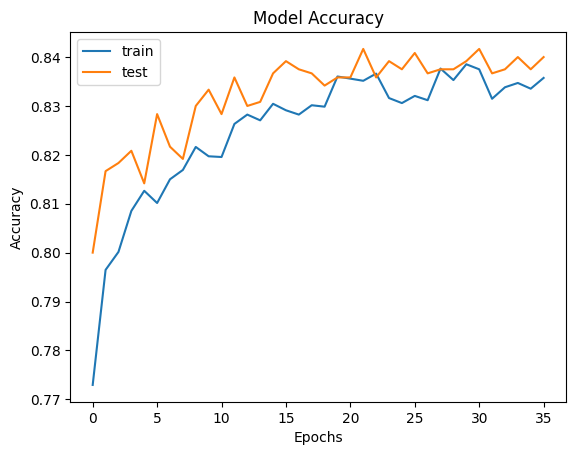

In [77]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

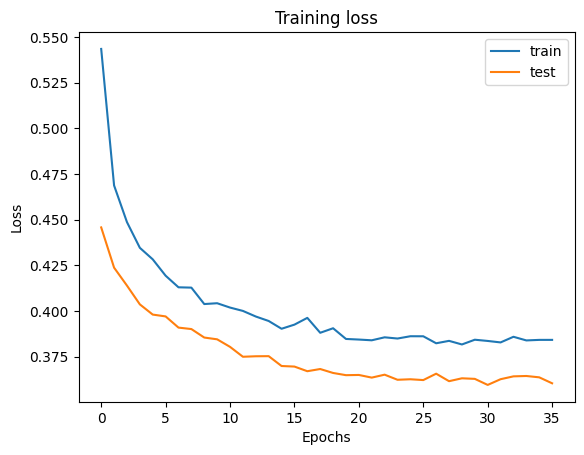

In [78]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])


In [79]:
#making prediction and evaluating the model performance
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [80]:
#plotting confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1582,   25],
       [ 285,  108]], dtype=int64)

In [81]:
#calculating accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.845

In [82]:
#getting weights of the model
classifier.get_weights()

[array([[-0.09345872, -0.04145567, -0.18993291],
        [ 0.29579684,  0.43103448,  0.9014721 ],
        [-0.00839236,  0.00897884, -0.14439015],
        [ 0.2976476 , -0.35582677,  0.74452966],
        [ 1.2332536 , -1.3881007 ,  0.38834488],
        [-0.02464692, -0.0037471 , -0.16071858],
        [-0.34067407, -0.32278308, -0.2684424 ],
        [ 0.06596104,  0.02058369, -0.20917264],
        [-0.05818653,  0.38187522,  0.07410875],
        [ 0.08723691,  0.05394799,  0.02964139],
        [-0.15900181, -0.11175008, -0.36307743]], dtype=float32),
 array([-0.6395435 ,  0.02122216, -0.04665605], dtype=float32),
 array([[ 0.9482184 , -0.19817504, -0.25038803, -0.5026529 ,  0.45242113,
         -0.19096796, -0.18623628, -0.620901  , -0.5575611 ],
        [-0.10868577, -0.31180543, -0.7111201 ,  0.69986904,  0.32889757,
         -0.3404961 , -0.3476188 , -0.5054585 ,  0.3650924 ],
        [ 0.18312103, -0.50506943, -0.05552704,  0.10888343, -0.01311623,
         -0.7416253 , -0.5464628 ,